<a href="https://colab.research.google.com/github/keilabcs/Awesome-Sketch-Synthesis/blob/master/Classifica%C3%A7%C3%A3o_de_Coronav%C3%ADrus_Bin%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código baseado no post de Adrian Yijie Xu disponível em: https://towardsdatascience.com/detecting-covid-19-induced-pneumonia-from-chest-x-rays-with-transfer-learning-an-implementation-311484e6afc1


In [0]:
import numpy as np
import tensorflow as tf

In [3]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:01, 127MB/s] 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!unzip Covid_Data_GradientCrescent.zip


Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1401-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1406-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1412-0001.jpeg  


In [0]:
train_dir = 'two/train'
test_dir = 'two/test'
img_size = (150, 150)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 validation_split = 0.2,
 fill_mode='nearest')

train_batches = train_datagen.flow_from_directory(train_dir,
 target_size=img_size,
 shuffle=True,
 batch_size=10,
 subset = "training",
 seed=42,
 class_mode="binary",
  )

valid_batches = train_datagen.flow_from_directory(train_dir,
 target_size=img_size,
 shuffle=True,
 batch_size=10,
 subset = "validation",
 seed=42,
 class_mode="binary",
  )

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers

conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = False
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.0005), metrics=['acc'])

In [15]:
result=model.fit(train_batches,
 steps_per_epoch = train_batches.n//train_batches.batch_size,
 validation_data = valid_batches,
 validation_steps = valid_batches.n//valid_batches.batch_size,
 epochs = 20,
 )

Epoch 1/20
10/10 [==============================] - 4s 361ms/step - loss: 0.6257 - acc: 0.6900 - val_loss: 0.2461 - val_acc: 0.9000
Epoch 2/20
10/10 [==============================] - 4s 356ms/step - loss: 0.3188 - acc: 0.8617 - val_loss: 0.3190 - val_acc: 0.8000
Epoch 3/20
10/10 [==============================] - 3s 318ms/step - loss: 0.2899 - acc: 0.8617 - val_loss: 0.1973 - val_acc: 0.9500
Epoch 4/20
10/10 [==============================] - 4s 360ms/step - loss: 0.1338 - acc: 0.9255 - val_loss: 0.0860 - val_acc: 0.9500
Epoch 5/20
10/10 [==============================] - 3s 328ms/step - loss: 0.1030 - acc: 0.9574 - val_loss: 0.1443 - val_acc: 0.9500
Epoch 6/20
10/10 [==============================] - 4s 355ms/step - loss: 0.1798 - acc: 0.9362 - val_loss: 0.0482 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 3s 327ms/step - loss: 0.0949 - acc: 0.9574 - val_loss: 0.1299 - val_acc: 0.9000
Epoch 8/20
10/10 [==============================] - 3s 336ms/step - loss: 0.

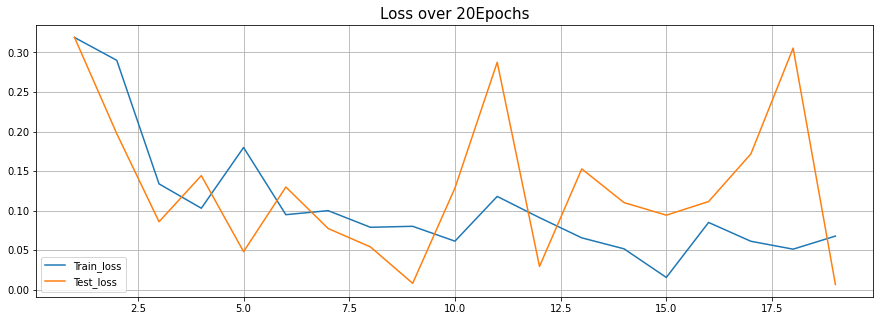

In [16]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 loss = result.history['loss']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [18]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=img_size,
 batch_size=1,
 shuffle=False,
 class_mode='binary')

x = model.evaluate_generator(
 test_generator,
 steps = test_generator.n,
 verbose = 1
 )
print('Test loss:', x[0])
print('Test accuracy:',x[1])

Found 18 images belonging to 2 classes.
18/18 [==============================] - 1s 28ms/step - loss: 0.0041 - acc: 1.0000
Test loss: 0.004089144058525562
Test accuracy: 1.0


In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)/255.0
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print("Normal")
  else:
    print("COVID19")